## Курсовой проект

#### Подключение библиотек и скриптов

In [48]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

#### Пути к директориям и файлам

In [3]:
TRAIN_DATASET_PATH = 'project_task/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'project_task/test.csv'

## Загрузка данных

Описание датасета

* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [5]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [6]:
train_df.shape[1]-1 == test_df.shape[1]

True

In [7]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [8]:
train_df.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

In [9]:
# чтобы не забыть обработать эти категориальные признаки
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [10]:
train_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

## Обзор данных

#### Целевая переменная

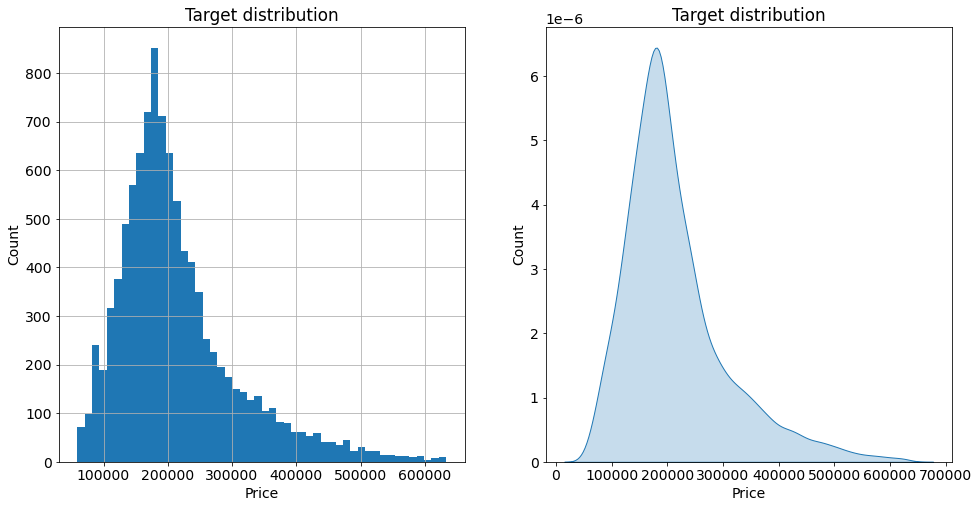

In [11]:
# логнормальное распределение
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Price'].hist(bins = 50)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')

plt.show()

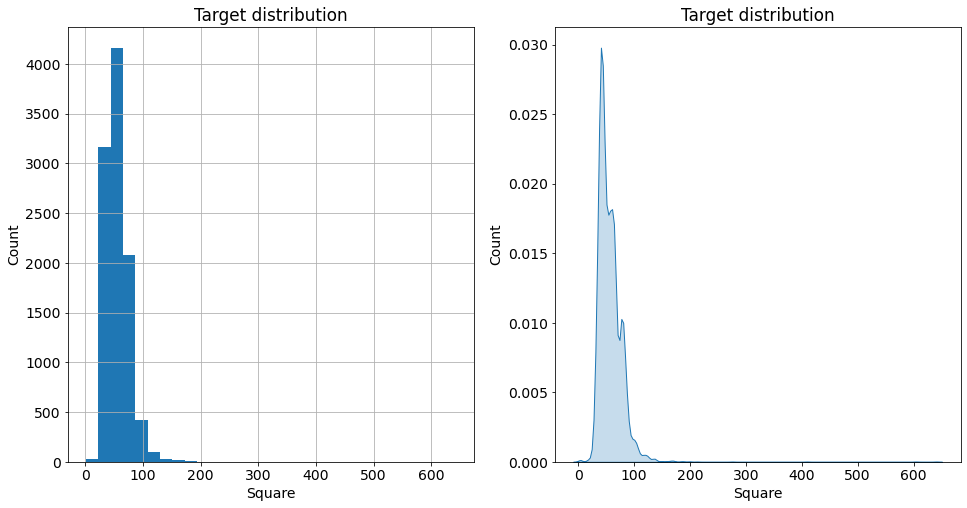

In [155]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Square'].hist(bins = 30)
plt.ylabel('Count')
plt.xlabel('Square')
plt.title('Target distribution')

plt.subplot(122)
sns.kdeplot(train_df['Square'], shade=True, legend=False)
plt.ylabel('Count')
plt.xlabel('Square')
plt.title('Target distribution')

plt.show()

#### Количественные переменные

In [12]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [89]:
zero_rooms = train_df.loc[train_df['Rooms'] == 0][['Square']]
rooms_square_df = train_df.loc[train_df['Rooms'] != 0][['Square']]
rooms_square_df

,Square
0,115.027311
1,39.832524
2,78.342215
3,40.409907
4,64.285067
...,...
9995,49.090728
9996,64.307684
9997,29.648057
9998,32.330292


In [110]:
rooms_square_cat = train_df.groupby('Rooms').mean()['Square']
rooms_square_cat

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: Square, dtype: float64

In [111]:
zero_rooms

,Square
2194,38.697117
3780,41.790881
5894,49.483501
6401,87.762616
7644,212.932361
7929,81.491446
9767,138.427694
9869,2.377248


In [114]:
target = train_df.loc[train_df['Rooms'] != 0][['Rooms']]
target

,Rooms
0,3.0
1,1.0
2,3.0
3,1.0
4,2.0
...,...
9995,2.0
9996,2.0
9997,1.0
9998,1.0


In [144]:
y = pd.DataFrame(target, columns=["Rooms"])
X_train, X_test, y_train, y_test = train_test_split(rooms_square_df, y, test_size = 0.4)

In [145]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pred = lr.predict(X_test)
check_test = pd.DataFrame({
    "y_test": y_test["Rooms"],    
    "y_pred": y_pred.flatten()
})

check_test.head(10)

,y_test,y_pred
2343,3.0,2.481634
5089,1.0,1.515559
1650,1.0,1.375442
1194,2.0,1.923495
6618,3.0,4.004415
6540,1.0,1.560628
6910,3.0,2.581630
5323,3.0,2.390628
9747,2.0,1.626243
1331,1.0,1.423625


In [147]:
from sklearn.metrics import mean_squared_error
mean_squared_error(check_test["y_pred"], check_test["y_test"])

0.3438734072761447

In [148]:
y_pred1 = lr.predict(zero_rooms)
y_pred1


array([[1.41957709],
       [1.50225064],
       [1.70781777],
       [2.73073687],
       [6.07560321],
       [2.56315465],
       [4.08464164],
       [0.4490142 ]])

In [149]:
zero_rooms

,Square
2194,38.697117
3780,41.790881
5894,49.483501
6401,87.762616
7644,212.932361
7929,81.491446
9767,138.427694
9869,2.377248


In [150]:
y

,Rooms
0,3.0
1,1.0
2,3.0
3,1.0
4,2.0
...,...
9995,2.0
9996,2.0
9997,1.0
9998,1.0


In [151]:
y_pred = lr.predict(X_test)
check_test = pd.DataFrame({
    "Square": zero_rooms['Square'],
    "y_pred": y_pred1.flatten()
})
check_test['y_pred'] = round(check_test['y_pred'])
check_test.head(10)

,Square,y_pred
2194,38.697117,1.0
3780,41.790881,2.0
5894,49.483501,2.0
6401,87.762616,3.0
7644,212.932361,6.0
7929,81.491446,3.0
9767,138.427694,4.0
9869,2.377248,0.0


In [152]:
zero_rooms

,Square
2194,38.697117
3780,41.790881
5894,49.483501
6401,87.762616
7644,212.932361
7929,81.491446
9767,138.427694
9869,2.377248
